<p style="background-color:saddlebrown ;font-family:newtimeroman;color:white;font-size:170%;text-align:center;border-radius:40px 60px;">Bank Marketing Classification!</p>
<div style="width:100%;text-align: center;"> <img align=middle src="https://miro.medium.com/max/1160/1*sxKJXWcaPOs7qpGTghmg0A.jpeg" alt="Heat beating" style="width:1000px;height:500px;margin-top:3rem;"> </div>

**<span style="color:saddlebrown;"> Bank Marketing </span>** This real data belongs directly to bank marketing campaigns that were made over the phone by the Portuguese banking institution targeting bank clients to make a bank term deposit. The purpose of this notebook is to further analyze and create a model that would help the bank to focus on the right clients rather than focusing on all. This way they could save a lot of time and have even better chances on finding what they are looking for.

# <p style="background-color:saddlebrown;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Table Of Contents</p>
* **Importing Library**
* **Loading data**
* **Data Visualization & Preprocessing**
* **Model Building**

# <p style="background-color:saddlebrown;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 40px;">Importing Libraries</p>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import datetime
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score, make_scorer,confusion_matrix,accuracy_score
import time as time
from sklearn.svm import SVC

# <p style="background-color:saddlebrown;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 40px;">Loading Data</p>
**About the data:**
This data was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) website and its aim is to predict if the client is going to subscribe to a term deposit or not.

*  This datasets attributes are:-

*  age (numeric)
*  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
*  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
*  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
*  default: has credit in default? (categorical: 'no','yes','unknown')
*  housing: has housing loan? (categorical: 'no','yes','unknown')
*  loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**
*  contact: contact communication type (categorical: 'cellular','telephone')
*  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
*  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
*  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
*  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  previous: number of contacts performed before this campaign and for this client (numeric)
*  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Output variable (desired target):**
*  y: has the client subscribed a term deposit? (binary: 'yes','no')

Note: Dataset details are from data scource found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

Dataset Sources:[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014



In [2]:
my_file = Path("bank.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Bank-Marketing-Classification/main/bank-full.csv'
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Bank-Marketing-Classification/main/bank.csv'

--2022-10-19 11:07:51--  https://raw.githubusercontent.com/Bahaakhalled/Bank-Marketing-Classification/main/bank-full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘bank-full.csv’

bank-full.csv       100%[===================>]   4.40M  --.-KB/s    in 0.04s   

2022-10-19 11:07:51 (120 MB/s) - ‘bank-full.csv’ saved [4610348/4610348]

--2022-10-19 11:07:52--  https://raw.githubusercontent.com/Bahaakhalled/Bank-Marketing-Classification/main/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [3]:
bank=pd.read_csv('bank-full.csv',sep=';')
banktwo=pd.read_csv('bank.csv',sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.rename(columns={'default': 'Failed Payments', 'duration': 'last contact duration','previous':'previous contacts','y':'Term Deposit','housing':'housing loan','loan':'personal loan','campaign':'ncontacts','pdays':'last contact'}, inplace=True)

In [6]:
bank.shape

(45211, 17)

# <p style="background-color:saddlebrown;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 40px;">Data Visualization & Preprocessing</p>


<AxesSubplot:>

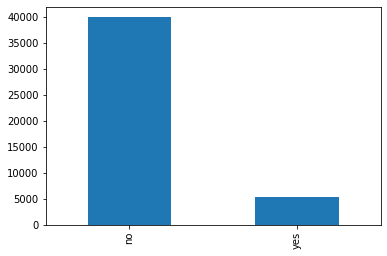

In [7]:
bank['Term Deposit'].value_counts().plot(kind='bar')

**Data Imbalance**:

Regarding imbalanced data i'm going to continue without balancing the data as taking a term deposit is clearly a specific result so i won't be creating any synthetic points to balance, i will most likely oversample it if required after creating the base model

In [8]:
cols=bank.loc[:,bank.nunique()==2].columns
for j in cols:
  bank[j]=bank[j].map({'yes': 1, 'no': 0})
  
bank.month=bank.month.map({'jan': 1, 'feb': 2,'mar': 3, 'apr': 4,'may': 5, 'jun': 6,'jul': 7, 'aug': 8,'sep': 9, 'oct': 10,'nov': 11, 'dec': 12})

for j in bank.columns:
  bank[j]=bank[j].replace('unknown',pd.NA)

The below cell displays the percentage of missing data in every column containing missing values

**In order to sort the missing values i decided to:-**

* job : Drop NA (0.6% only of the column were missing)

* education : Drop NA (4% were missing)

* contact : Fill mode (91% of data had cellular as value)

* poutcome : Drop column (81% were missing)

In [9]:
bank.loc[:,bank.isnull().sum()>0].isnull().sum()/bank.shape[0]*100

job           0.637013
education     4.107407
contact      28.798301
poutcome     81.747805
dtype: float64

In [10]:
bank.contact.dropna().value_counts()/bank.contact.dropna().shape[0]*100

cellular     90.972632
telephone     9.027368
Name: contact, dtype: float64

In [11]:
missing=(bank.isnull().sum().sum()/np.product(bank.shape) ) * 100
print('Data Missing: ',missing,'%')

Data Missing:  6.781795684808617 %


In [12]:
print(int(missing),' % of the cells are missing is low but that is',bank.shape[0] - bank.dropna().shape[0],'out of the',bank.shape[0],'rows given')

6  % of the cells are missing is low but that is 37369 out of the 45211 rows given


In [13]:
bank=bank.drop(columns='poutcome',axis=1)
bank['contact']=bank['contact'].replace(pd.NA,bank.contact.mode()[0])
bank = bank.dropna()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Failed Payments'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'housing loan'}>,
        <AxesSubplot:title={'center':'personal loan'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'last contact duration'}>,
        <AxesSubplot:title={'center':'ncontacts'}>],
       [<AxesSubplot:title={'center':'last contact'}>,
        <AxesSubplot:title={'center':'previous contacts'}>,
        <AxesSubplot:title={'center':'Term Deposit'}>]], dtype=object)

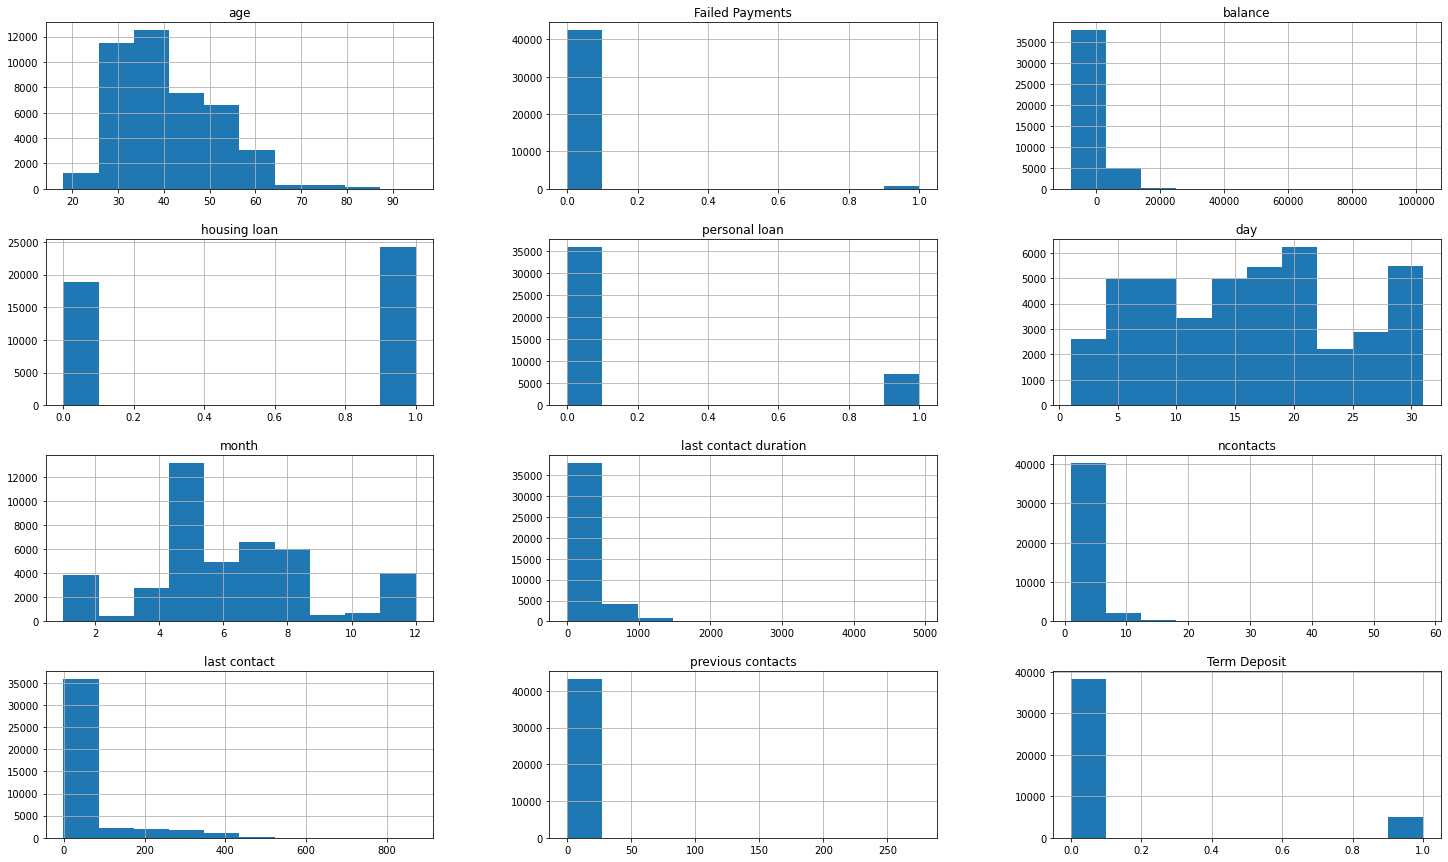

In [14]:
bank.hist(figsize=(25,15))

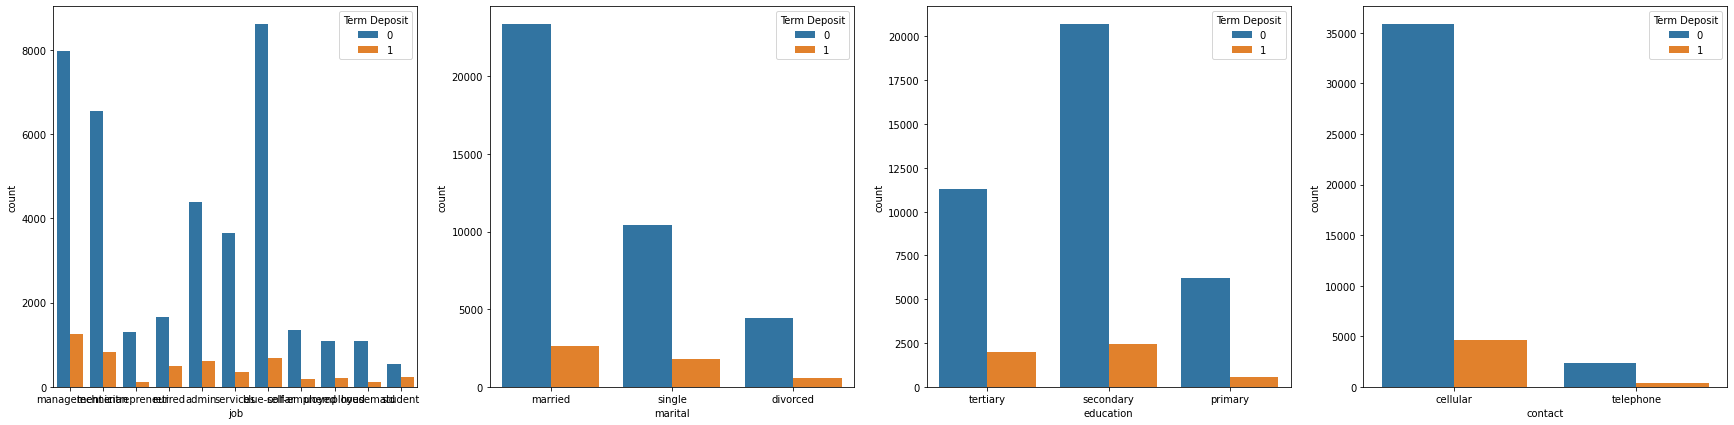

In [15]:
cat_cols=bank.select_dtypes(include='object').columns
fig, axes = plt.subplots(1, 4,figsize=(30,7))
j=0
for i in cat_cols:
  sns.countplot(x=bank[i],ax=axes[j],hue=bank['Term Deposit'])
  j+=1

We see that 94% of clients with negative balance do not get loans

In [16]:
bank.loc[bank.balance<0]['Term Deposit'].value_counts()/bank.loc[bank.balance<0].shape[0]

0    0.943038
1    0.056962
Name: Term Deposit, dtype: float64

In [17]:
bank.loc[bank['last contact']>0]['Term Deposit'].value_counts()

0    6113
1    1799
Name: Term Deposit, dtype: int64

**last contact** contains -1 95% of the data which means this person has not been contacted by a campaign before or the info is unknown, i first thought of dropping the column but based on the low number of features and after checking its correlation with the target column i decided to leave it as is and even open for further changes

In [18]:
#bank['year']=datetime.datetime.now().year

In [19]:
#bank['date']=pd.to_datetime(bank[["year","month", "day"]])
#bank=bank.drop('year',axis=1)

In [20]:
bank.corr()['Term Deposit'].sort_values(ascending=False)

Term Deposit             1.000000
last contact duration    0.397393
last contact             0.101446
previous contacts        0.091764
balance                  0.051386
age                      0.024760
month                    0.016888
Failed Payments         -0.023244
day                     -0.030247
personal loan           -0.068802
ncontacts               -0.072465
housing loan            -0.138300
Name: Term Deposit, dtype: float64

In [21]:
bank.describe()

,age,Failed Payments,balance,housing loan,personal loan,day,month,last contact duration,ncontacts,last contact,previous contacts,Term Deposit
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,0.018105,1354.027342,0.562406,0.164541,15.809414,6.151483,258.323409,2.758178,40.404070,0.584863,0.116246
std,10.512640,0.133332,3042.103625,0.496096,0.370770,8.305970,2.409781,258.162006,3.063987,100.420624,2.332672,0.320523
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,71.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,442.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1412.000000,1.000000,0.000000,21.000000,8.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,58.000000,871.000000,275.000000,1.000000


**outliers worth the look at balance**

<AxesSubplot:xlabel='balance', ylabel='age'>

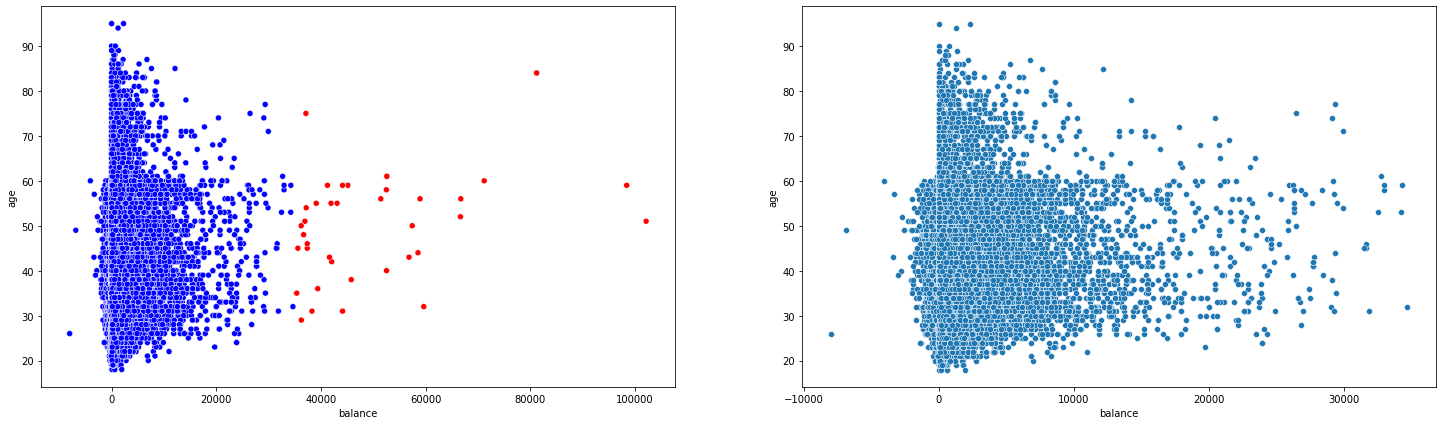

In [22]:
plot , ax = plt.subplots(1 , 2 , figsize = (25 , 7))

outliers = bank["balance"]>35000
sns.scatterplot(data=bank, x="balance", y="age",c = ["red" if is_outlier  else "blue" for is_outlier  in outliers],ax=ax[0])

bank.drop(bank[outliers].index , inplace = True)
sns.scatterplot(data = bank ,x="balance", y="age",ax=ax[1])

In [23]:
bank.shape

(43154, 16)

<Figure size 432x288 with 0 Axes>

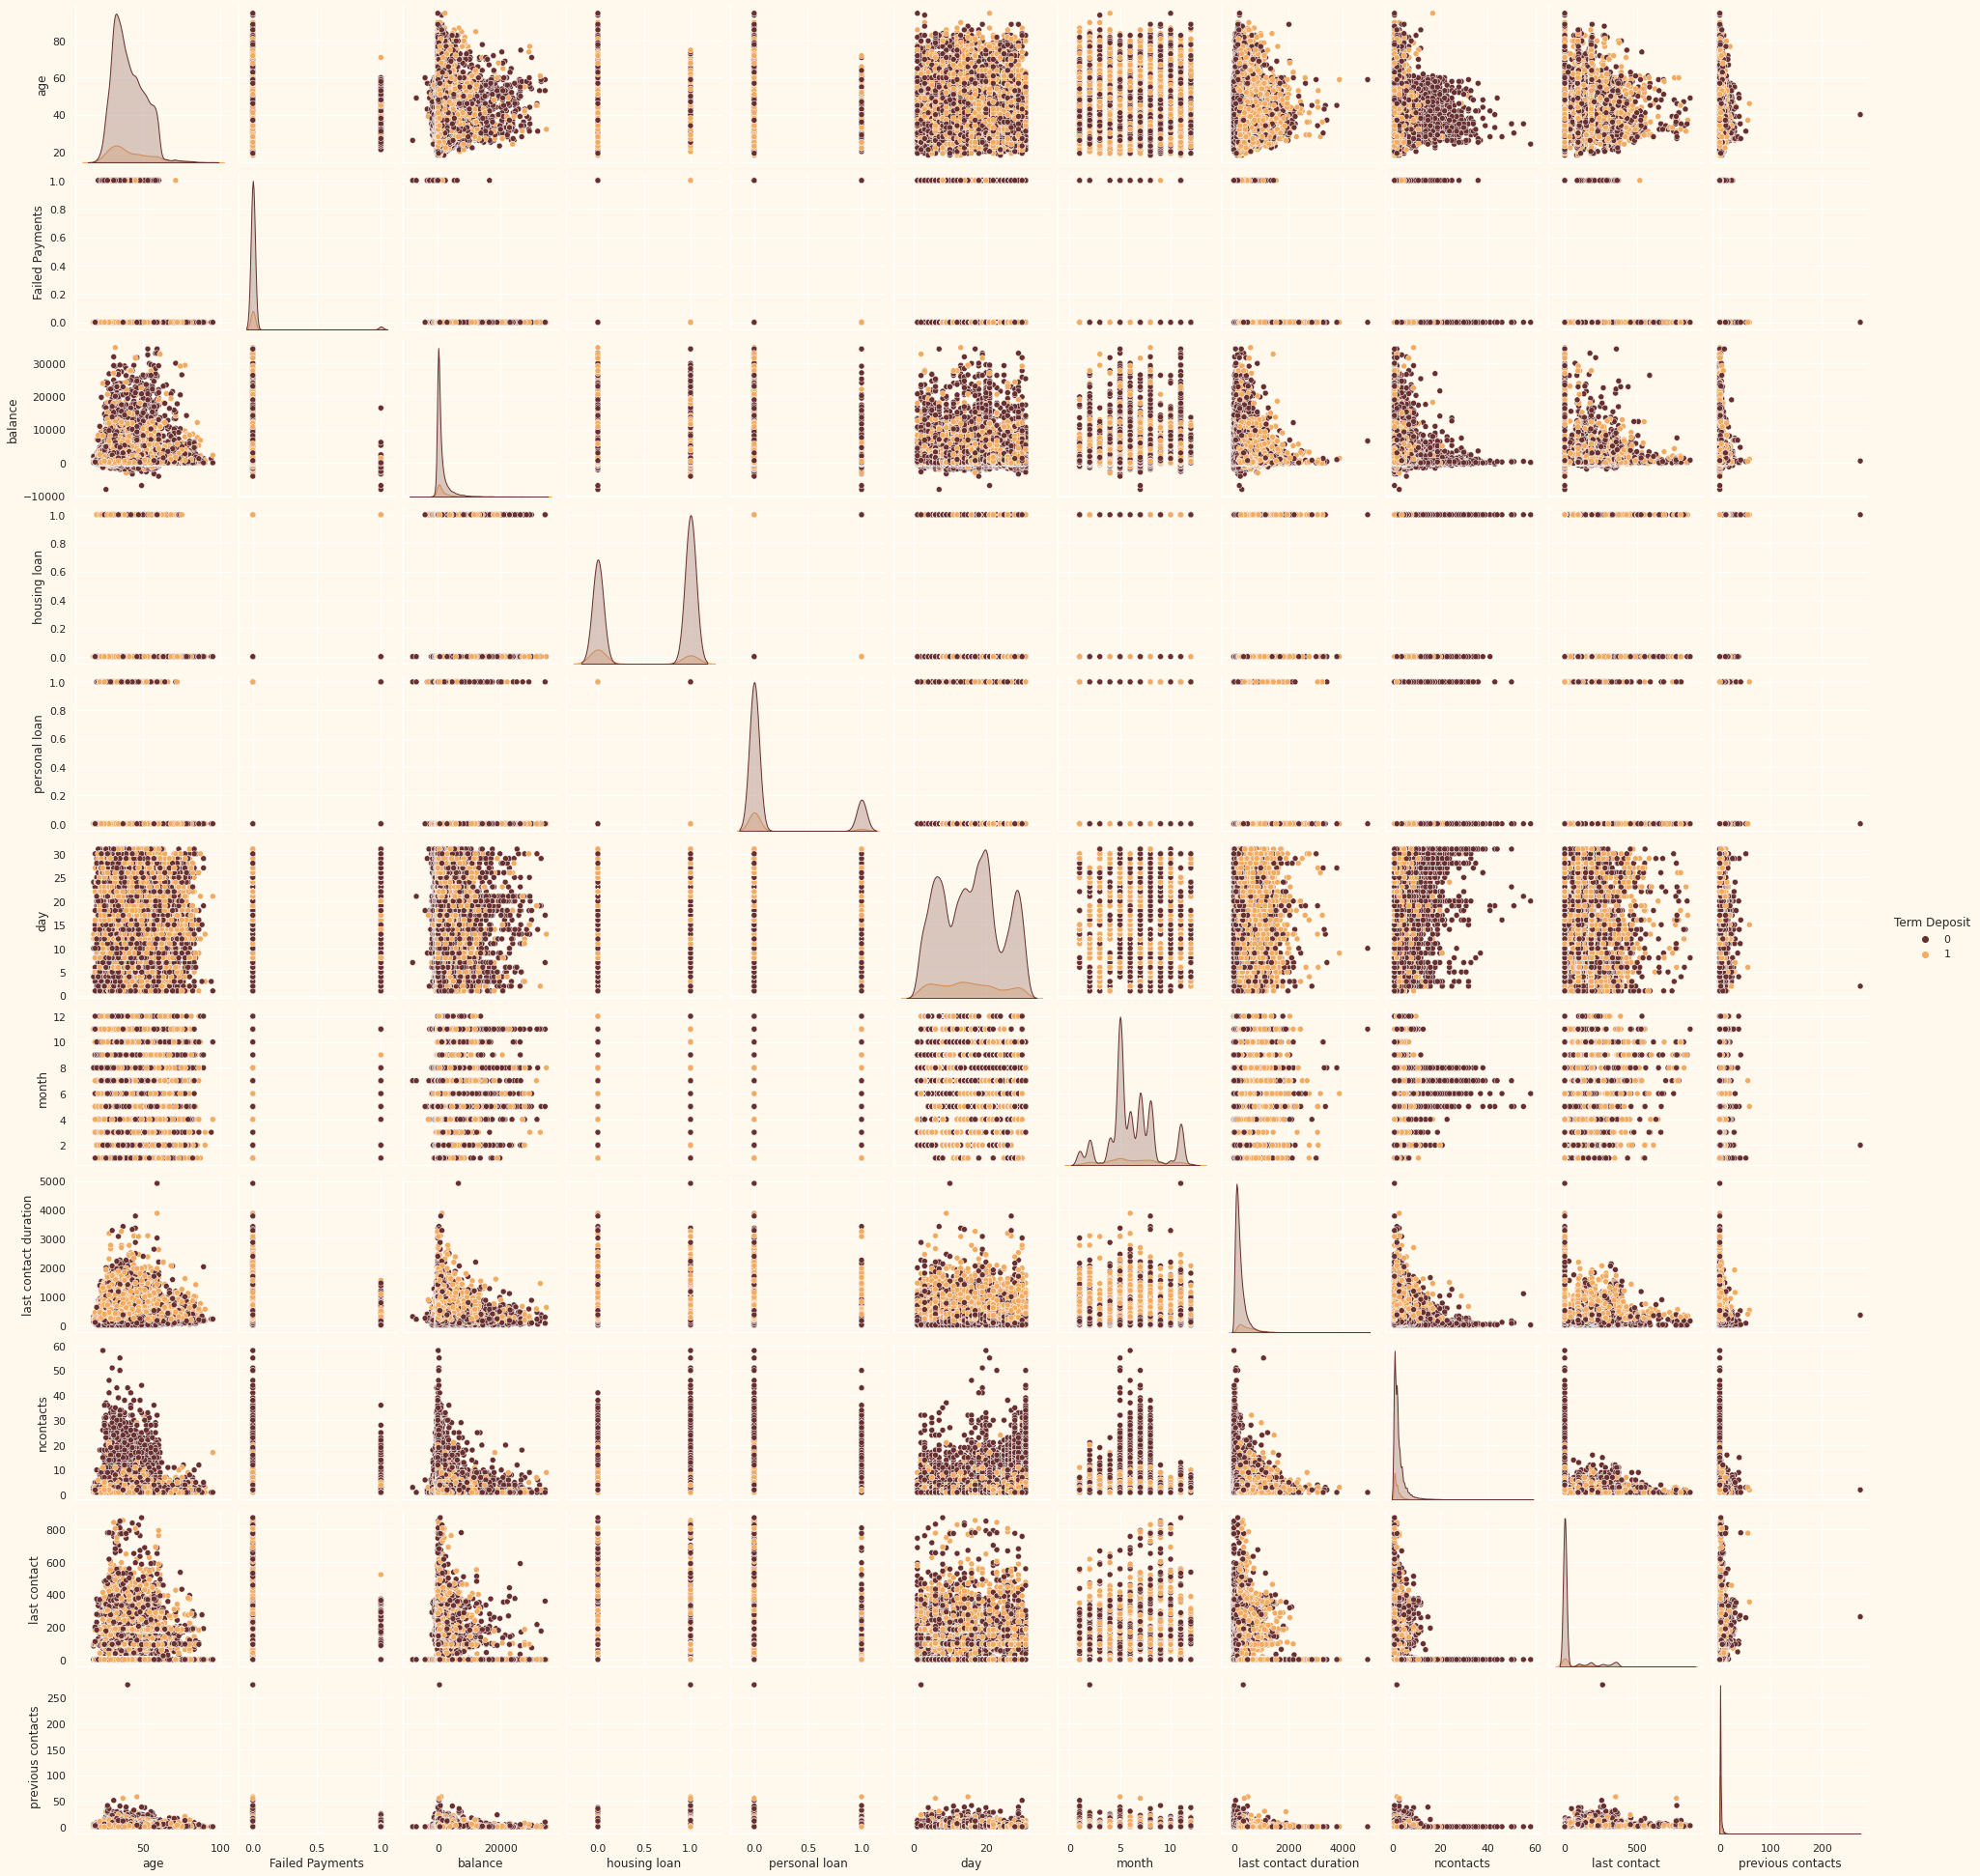

In [24]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure()
sns.pairplot(bank.select_dtypes(exclude='object'), hue= "Term Deposit",palette= (["#682F2F","#F3AB60"]))

plt.show()

<AxesSubplot:>

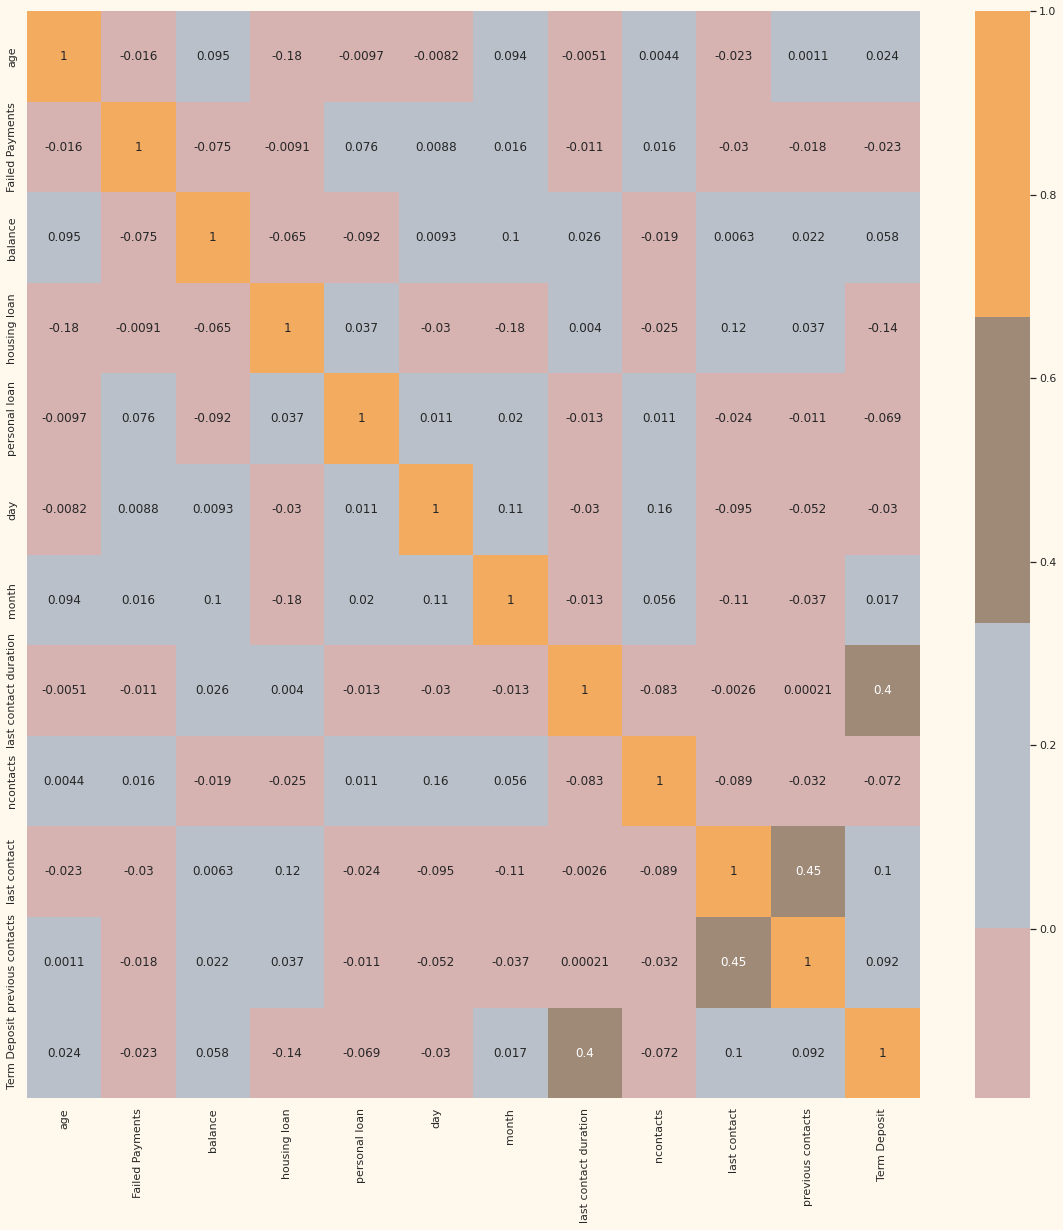

In [25]:
corrmat= bank.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

# <p style="background-color:saddlebrown;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Model Building and Evaluating</p>

**This phase included:-**
* Encoding Categorical Values
* Splitting the bank file to train and testing data
* Training the training data on 6 different models
* Hyperparameter tuning the highest model for further improvement
* Testing the best and tuned model with the other 10% of the data file and Evaluating results

In [26]:
cp_bank=bank.copy()

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(cp_bank.select_dtypes(exclude='object'))
#temp = pd.DataFrame(scaler.transform(cp_bank.select_dtypes(exclude='object')),columns= cp_bank.select_dtypes(exclude='object').columns)
cp_bank=pd.get_dummies(cp_bank, drop_first=True)
cp_bank.head()

,age,Failed Payments,balance,housing loan,personal loan,day,month,last contact duration,ncontacts,last contact,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,contact_telephone
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,0,1,0,0,1,1,0,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,0,0,1,0,1,0,0
5,35,0,231,1,0,5,5,139,1,-1,...,0,0,0,0,0,1,0,0,1,0
6,28,0,447,1,1,5,5,217,1,-1,...,0,0,0,0,0,0,1,0,1,0


In [28]:
X=cp_bank.drop('Term Deposit',axis=1)
y=cp_bank['Term Deposit']

In [29]:
def predictbasicmodels(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("X set has {} samples.".format(X.shape))
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  clf_A = SVC(random_state=3)
  clf_B = LogisticRegression(random_state=3)
  clf_C = GaussianNB()

  results = {}
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      results = {}
      clf = clf.fit(X_train, y_train)
        
      predictions_test = clf.predict(X_test)
      print(clf)
      print('Accuracy Score: ' + str(accuracy_score(y_test,predictions_test)))
      print('fb Score: '+ str(fbeta_score(y_test,predictions_test,beta=0.5)))
      print()
  return X_train, X_test, y_train, y_test

def predictadvmodels(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  clf_A = RandomForestClassifier(random_state=3)
  clf_B = DecisionTreeClassifier(random_state=3)
  clf_C = AdaBoostClassifier(random_state=3)

  results = {}
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      results = {}
      clf = clf.fit(X_train, y_train)
        
      predictions_test = clf.predict(X_test)
      print(clf)
      print('Accuracy Score: ' + str(accuracy_score(y_test,predictions_test)))
      print('fb Score: '+ str(fbeta_score(y_test,predictions_test,beta=0.5)))
      print()
  return X_train, X_test, y_train, y_test

In [30]:
X_train, X_test, y_train, y_test=predictbasicmodels(X,y)

X set has (43154, 26) samples.
Training set has 34523 samples.
Testing set has 8631 samples.

SVC(random_state=3)
Accuracy Score: 0.8869192445834782
fb Score: 0.06899724011039558

LogisticRegression(random_state=3)
Accuracy Score: 0.8874985517321283
fb Score: 0.35535307517084286

GaussianNB()
Accuracy Score: 0.8302630054454871
fb Score: 0.3281884646628757



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
X_train, X_test, y_train, y_test=predictadvmodels(X,y)

Training set has 34523 samples.
Testing set has 8631 samples.

RandomForestClassifier(random_state=3)
Accuracy Score: 0.9018653690186537
fb Score: 0.5395574416489846

DecisionTreeClassifier(random_state=3)
Accuracy Score: 0.8653690186536902
fb Score: 0.42150333016175073

AdaBoostClassifier(random_state=3)
Accuracy Score: 0.8957247132429614
fb Score: 0.49248480972177805



In [32]:
def Gridsrch(clf):

  parameters={'n_estimators':[200,300,500],'min_samples_split':[2,3]}
  scorer=make_scorer(accuracy_score)
  grid_layout=GridSearchCV(clf,parameters,scoring=scorer)

  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  print(str(clf) +" before Optimization: " + str(accuracy_score(y_test,predictions)))
  print(str(clf) +" after Optimization: " + str(accuracy_score(y_test,best_predictions)))
  print(grid_fit.best_params_)
  return grid_fit


In [33]:
grid_fit=Gridsrch(RandomForestClassifier(random_state=3))

RandomForestClassifier(random_state=3) before Optimization: 0.9018653690186537
RandomForestClassifier(random_state=3) after Optimization: 0.902908121886224
{'min_samples_split': 3, 'n_estimators': 500}


In [34]:
banktwo=pd.read_csv('bank.csv',sep=';')

In [35]:
def preprocessdata(data):
  data.rename(columns={'default': 'Failed Payments', 'duration': 'last contact duration','previous':'previous contacts','y':'Term Deposit','housing':'housing loan','loan':'personal loan','campaign':'ncontacts','pdays':'last contact'}, inplace=True)
  cols=data.loc[:,data.nunique()==2].columns
  for j in cols:
    data[j]=data[j].map({'yes': 1, 'no': 0})
  
  data.month=data.month.map({'jan': 1, 'feb': 2,'mar': 3, 'apr': 4,'may': 5, 'jun': 6,'jul': 7, 'aug': 8,'sep': 9, 'oct': 10,'nov': 11, 'dec': 12})

  for j in data.columns:
    data[j]=data[j].replace('unknown',pd.NA)

  data=data.drop(columns='poutcome',axis=1)
  data['contact']=data['contact'].replace(pd.NA,bank.contact.mode()[0])
  data = data.dropna()
  data=pd.get_dummies(data, drop_first=True)
  newX=data.drop('Term Deposit',axis=1)
  newy=data['Term Deposit']
  return newX,newy

In [36]:
newX,newy=preprocessdata(banktwo)

In [37]:
preds=grid_fit.best_estimator_.predict(newX)

In [38]:
print(str(grid_fit.best_estimator_) +" Score on test file: " + str(accuracy_score(newy,preds)))

RandomForestClassifier(min_samples_split=3, n_estimators=500, random_state=3) Score on test file: 0.9793551380190211


The Second file gave an almost 98% accuracy using the Random Forest Classifier

**Further Improvements could be**
* Adding more features that make more sense to the target variable

In [39]:
preds=grid_fit.best_estimator_.fit(cp_bank.drop('Term Deposit',axis=1),cp_bank['Term Deposit']).predict(newX)
print(str(grid_fit.best_estimator_) +" Score on test file: " + str(accuracy_score(newy,preds)))

RandomForestClassifier(min_samples_split=3, n_estimators=500, random_state=3) Score on test file: 1.0
